### K-means

In [37]:
import warnings
warnings.filterwarnings(action='ignore')

### Import packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [39]:
df = pd.read_csv("EastWest.csv")

In [40]:
df = pd.read_csv("EastWest.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [42]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [43]:
df.drop(['ID#', 'cc1_miles','Qual_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'], axis=1, inplace=True)

In [44]:
df

,Balance,Days_since_enroll
0,28143,7000
1,19244,6968
2,41354,7034
3,14776,6952
4,97752,6935
...,...,...
3994,18476,1403
3995,64385,1395
3996,73597,1402
3997,54899,1401


## create Clusters

In [45]:
from sklearn.cluster import KMeans
# create object
k=4
kmmean = KMeans(n_clusters=k)
cluster_info =kmmean.fit(df)




In [46]:
cluster_info.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
len(cluster_info.labels_)

3999

In [48]:
len(cluster_info.cluster_centers_)

4

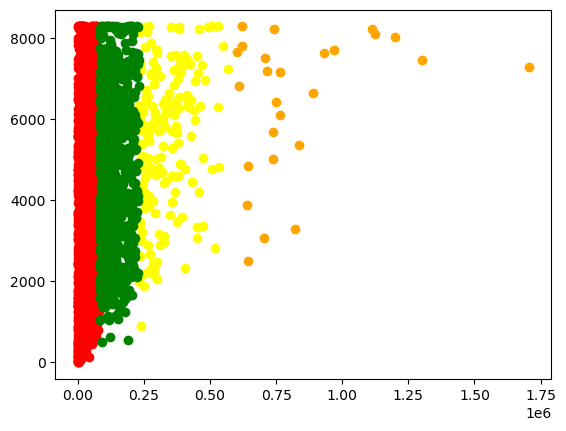

In [49]:
plt.scatter(df['Balance'][cluster_info.labels_==0],df['Days_since_enroll'][cluster_info.labels_==0],color ='red')
plt.scatter(df['Balance'][cluster_info.labels_==1],df['Days_since_enroll'][cluster_info.labels_==1],color ='yellow')
plt.scatter(df['Balance'][cluster_info.labels_==2],df['Days_since_enroll'][cluster_info.labels_==2],color ='green')
plt.scatter(df['Balance'][cluster_info.labels_==3],df['Days_since_enroll'][cluster_info.labels_==3],color ='orange')
#plt.scatter(df['Balance'][cluster_info.labels_==4],df['Days_since_enroll'][cluster_info.labels_==4],color ='blue')
# plt.ylabel("Spending Score")
# plt.title("Clusters")

In [50]:
from sklearn.cluster import KMeans

# create a list to get the within sum of squares for difrerent no of clusters
wss = []

# create a loop to find the wss for different no of clusters
for k in range(1, 10):

    # create KMeans object
    kmeans = KMeans(n_clusters=k)

    # fit the data
    clusters_info = kmeans.fit(df)

    # collect the wss for k
    wss.append(clusters_info.inertia_)

In [51]:
wss

[40619677714944.54,
 18685027788287.7,
 9872939494834.99,
 5668148571512.116,
 3986958294980.4326,
 2764805038063.048,
 1910252768481.18,
 1543163510212.6921,
 1393065637289.3228]

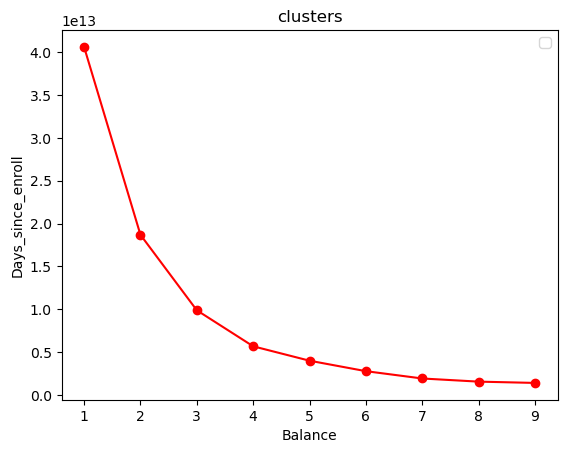

In [52]:
plt.scatter(range(1,10),wss,color='red')
plt.plot(range(1,10),wss,color='red')
plt.xlabel("Balance")
plt.ylabel("Days_since_enroll")
plt.title("clusters")
plt.legend()


In [53]:
df = pd.read_csv("EastWest.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [54]:
df.drop(['ID#', 'cc1_miles','Qual_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'], axis=1, inplace=True)

In [55]:
df

,Balance,Bonus_miles
0,28143,174
1,19244,215
2,41354,4123
3,14776,500
4,97752,43300
...,...,...
3994,18476,8525
3995,64385,981
3996,73597,25447
3997,54899,500


In [56]:
from sklearn.cluster import KMeans
n=5
kmeans =KMeans(n_clusters=n)
clusters_info = kmeans.fit(df)

In [57]:
clusters_info.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [58]:
clusters_info.cluster_centers_

array([[ 25819.07483819,   8531.69902913],
       [419966.51136364,  49823.32954545],
       [ 96786.65046729,  27635.59345794],
       [207048.85428571,  35445.69428571],
       [922162.52631579,  58492.05263158]])

In [59]:
len(clusters_info.cluster_centers_)

5

In [60]:
clusters_info.n_iter_

5

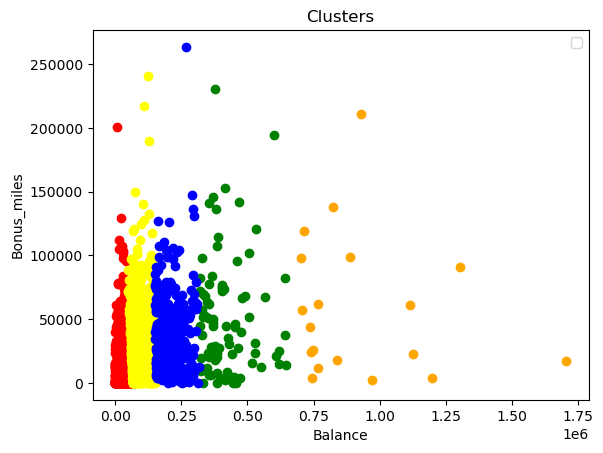

In [61]:
plt.scatter(df['Balance'][clusters_info.labels_ ==0],df['Bonus_miles'][clusters_info.labels_ ==0],color='red')
plt.scatter(df['Balance'][clusters_info.labels_ ==1],df['Bonus_miles'][clusters_info.labels_ ==1],color='green')
plt.scatter(df['Balance'][clusters_info.labels_ ==2],df['Bonus_miles'][clusters_info.labels_ ==2],color='yellow')
plt.scatter(df['Balance'][clusters_info.labels_ ==3],df['Bonus_miles'][clusters_info.labels_ ==3],color='blue')
plt.scatter(df['Balance'][clusters_info.labels_ ==4],df['Bonus_miles'][clusters_info.labels_ ==4],color='orange')
plt.xlabel("Balance")
plt.ylabel('Bonus_miles')
plt.title('Clusters')
plt.legend()

### Elbow methods

In [62]:
wss =[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    clusters_info = kmeans.fit(df)
    wss.append(clusters_info.inertia_)

In [63]:
wss

[42934537571107.305,
 20797190534882.45,
 11803224632591.223,
 7523937487036.421,
 5872157122074.372,
 4775522675805.714,
 3674776903077.3936,
 3278914787173.9824,
 2874798132458.7886]

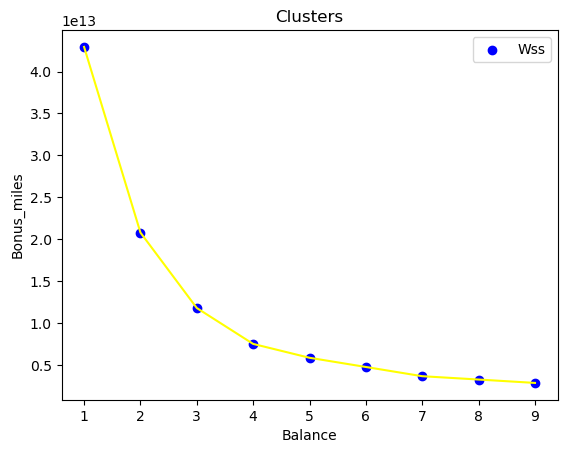

In [64]:
plt.scatter(range(1,10),wss,label ="Wss",color = "blue")
plt.plot(range(1,10),wss,color = "yellow")
plt.xlabel("Balance")
plt.ylabel('Bonus_miles')
plt.title('Clusters')
plt.legend()

## Hierarchial Clustering

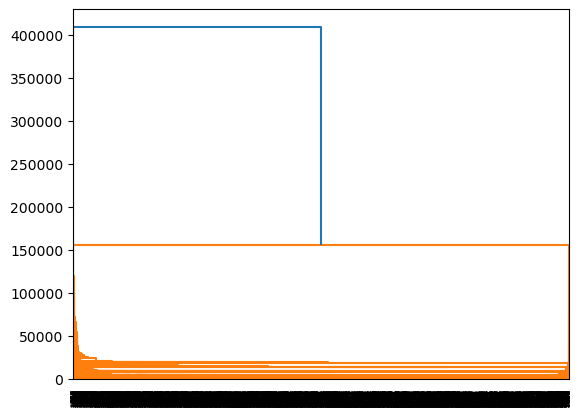

In [65]:
from scipy.cluster import hierarchy

link =hierarchy.linkage(df,'single')
Dendogram = hierarchy.dendrogram(link)

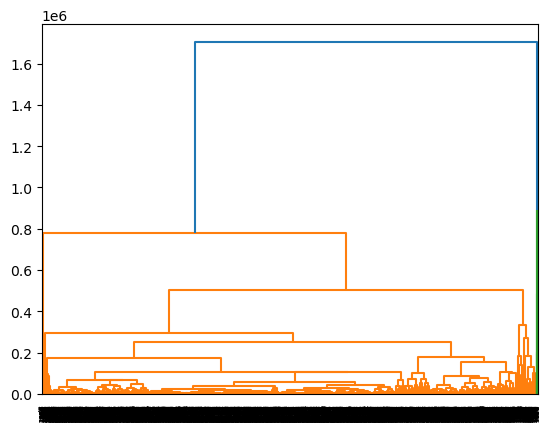

In [66]:
linkage= hierarchy.linkage(df,'complete')
dendrogram = hierarchy.dendrogram(linkage)

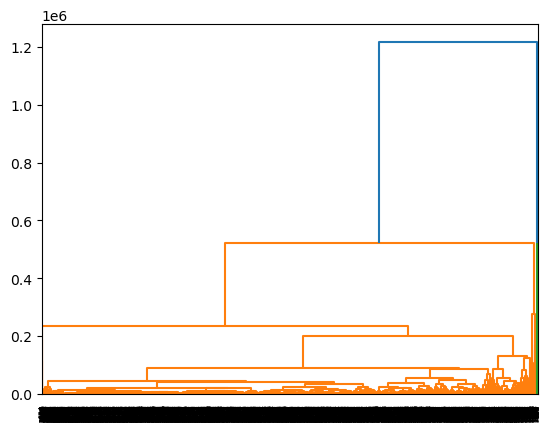

In [67]:
linkage = hierarchy.linkage(df,"average")
dendrogram=hierarchy.dendrogram(linkage)

In [76]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
cluster_info = AgglomerativeClustering(n_clusters=2)

# build the clusters
cluster_info = cluster_info.fit(df)

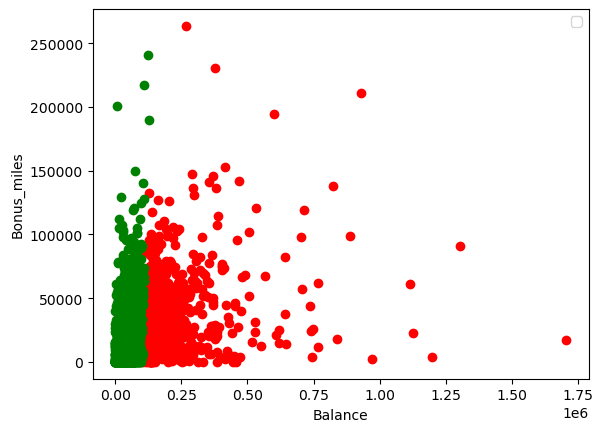

In [77]:
plt.scatter(df['Balance'][cluster_info.labels_==0],df['Bonus_miles'][cluster_info.labels_==0],color ="red")
plt.scatter(df['Balance'][cluster_info.labels_==1],df['Bonus_miles'][cluster_info.labels_==1],color ="green")
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.legend()

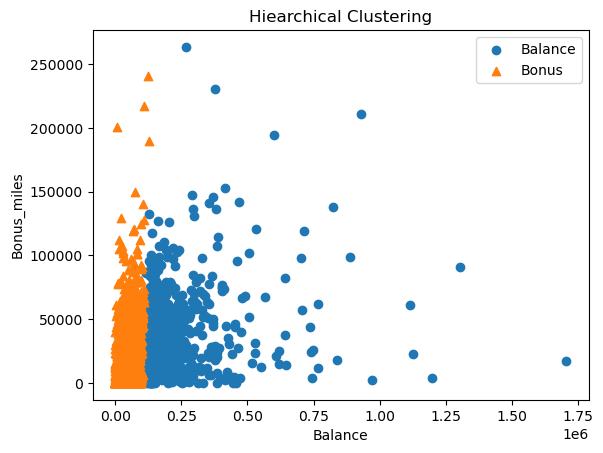

In [82]:
markers = ['o', '^']
labels = [
    "Balance","Bonus"
]
for cluster in range(2):
    plt.scatter(
        df['Balance'][cluster_info.labels_ == cluster],
        df['Bonus_miles'][cluster_info.labels_ == cluster],
        marker=markers[cluster],
        label=labels[cluster]
    )
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title("Hiearchical Clustering")
plt.legend()

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=25000,min_samples=5)
db=db.fit(df)


In [ ]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

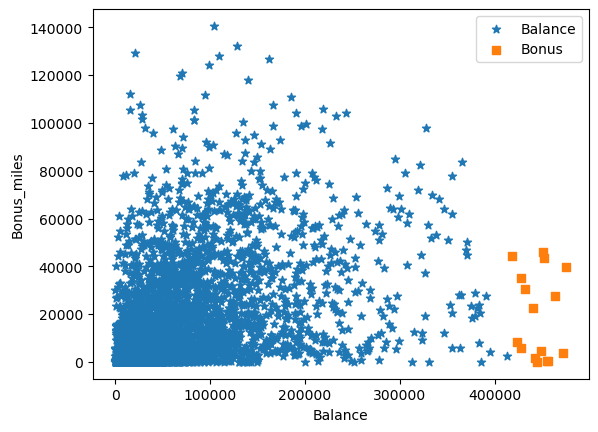

In [81]:
markers = ['*','s']
labels = [
    "Balance","Bonus"
]

for cluster in range(2):
    plt.scatter(
    df['Balance'][db.labels_==cluster],
    df['Bonus_miles'][db.labels_==cluster],
    marker=markers[cluster],   
    label=labels[cluster])


plt.xlabel("Balance")   
plt.ylabel("Bonus_miles") 
plt.legend()
